## Based on data generated on Apr 9, 2019

# General setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
pd.options.display.max_columns = 150

In [3]:
involved_hebrew = pd.read_csv('involved_hebrew.csv')

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,37,39,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# General info

In [4]:
involved_hebrew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678965 entries, 0 to 1678964
Data columns (total 50 columns):
accident_id                     1678965 non-null int64
provider_and_id                 1678965 non-null int64
provider_code                   1678965 non-null int64
involved_type                   1678965 non-null int64
involved_type_hebrew            1678965 non-null object
license_acquiring_date          1678965 non-null int64
age_group                       1678965 non-null int64
age_group_hebrew                1678965 non-null object
sex                             1326427 non-null float64
sex_hebrew                      1326427 non-null object
vehicle_type                    1586817 non-null float64
vehicle_type_hebrew             1586817 non-null object
safety_measures                 1678923 non-null float64
safety_measures_hebrew          1678923 non-null object
involve_yishuv_symbol           1310620 non-null float64
involve_yishuv_name             1308663 non-null 

In [5]:
involved_hebrew.describe()

,accident_id,provider_and_id,provider_code,involved_type,license_acquiring_date,age_group,sex,vehicle_type,safety_measures,involve_yishuv_symbol,injury_severity,injured_type,injured_position,population_type,home_region,home_district,home_natural_area,home_municipal_status,home_residence_type,hospital_time,medical_type,release_dest,safety_measures_use,late_deceased,car_id,involve_id,accident_year,accident_month,injury_severity_mais,injury_severity_mais_hebrew
count,1.678965e+06,1.678965e+06,1.678965e+06,1.678965e+06,1.678965e+06,1.678965e+06,1.326427e+06,1.586817e+06,1.678923e+06,1.310620e+06,1.049205e+06,1.049203e+06,1.678964e+06,1.678942e+06,1.310614e+06,1.678965e+06,1.310614e+06,328912.000000,1.310614e+06,52514.000000,52514.000000,52514.000000,57644.000000,3972.000000,1.586817e+06,1.678965e+06,1.678965e+06,1.678965e+06,0.0,0.0
mean,2.012707e+09,2.705987e+10,2.504716e+00,1.871149e+00,1.101455e+03,2.732633e+01,1.382718e+00,3.973413e+00,4.190374e+00,4.385316e+03,2.973031e+00,2.586740e+00,4.884486e+00,1.261285e+00,3.735065e+00,5.253919e+01,3.970584e+02,78.788877,1.790069e+01,1.678257,1.666775,1.304167,1.514312,1.036757,1.486035e+00,1.945111e+00,2.012665e+03,6.423790e+00,NaN,NaN
std,3.203520e+06,8.632861e+09,8.632855e-01,7.776397e-01,9.925499e+02,3.734404e+01,4.860504e-01,5.328324e+00,1.576453e+00,3.103903e+03,1.831252e-01,1.238693e+00,3.511086e+00,5.267109e-01,1.625473e+00,2.844132e+01,1.608121e+02,32.953161,6.893507e+00,0.467149,1.112918,0.781971,0.820254,0.188189,6.383036e-01,1.373073e+00,3.198939e+00,3.413110e+00,NaN,NaN
min,2.008000e+09,1.200800e+10,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.110000e+02,1.000000,9.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,2.008000e+03,1.000000e+00,NaN,NaN
25%,2.010022e+09,3.200800e+10,3.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.139000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.100000e+01,2.430000e+02,65.000000,1.300000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,2.010000e+03,3.000000e+00,NaN,NaN
50%,2.013001e+09,3.201101e+10,3.000000e+00,2.000000e+00,1.977000e+03,9.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,4.000000e+03,3.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,4.000000e+00,4.400000e+01,4.220000e+02,99.000000,1.500000e+01,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,2.013000e+03,6.000000e+00,NaN,NaN
75%,2.015096e+09,3.201500e+10,3.000000e+00,2.000000e+00,1.999000e+03,1.400000e+01,2.000000e+00,4.000000e+00,5.000000e+00,7.300000e+03,3.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,5.000000e+00,6.200000e+01,5.120000e+02,99.000000,2.500000e+01,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000e+00,2.000000e+00,2.015000e+03,9.000000e+00,NaN,NaN
max,2.018100e+09,3.201810e+10,3.000000e+00,3.000000e+00,4.444000e+03,9.900000e+01,2.000000e+00,2.500000e+01,5.000000e+00,9.800000e+03,3.000000e+00,9.000000e+00,9.000000e+00,4.000000e+00,8.000000e+00,9.900000e+01,9.990000e+02,99.000000,5.900000e+01,2.000000,9.000000,5.000000,3.000000,2.000000,3.000000e+01,7.900000e+01,2.018000e+03,1.200000e+01,NaN,NaN


In [6]:
involved_hebrew.head()

,accident_id,provider_and_id,provider_code,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,sex_hebrew,vehicle_type,vehicle_type_hebrew,safety_measures,safety_measures_hebrew,involve_yishuv_symbol,involve_yishuv_name,injury_severity,injury_severity_hebrew,injured_type,injured_type_hebrew,injured_position,injured_position_hebrew,population_type,population_type_hebrew,home_region,home_region_hebrew,home_district,home_district_hebrew,home_natural_area,home_natural_area_hebrew,home_municipal_status,home_municipal_status_hebrew,home_residence_type,home_residence_type_hebrew,hospital_time,hospital_time_hebrew,medical_type,medical_type_hebrew,release_dest,release_dest_hebrew,safety_measures_use,safety_measures_use_hebrew,late_deceased,late_deceased_hebrew,car_id,involve_id,accident_year,accident_month,injury_severity_mais,injury_severity_mais_hebrew
0,2008002397,12008002397,1,1,נהג,2000,6,25-29,1.0,זכר,1.0,רכב נוסעים פרטי,5.0,לא ידוע,8200.0,קריית מוצקין,NaN,NaN,NaN,NaN,8.0,לא ידוע,1.0,יהודים,3.0,חיפה,31,חיפה,311.0,אזור חיפה,NaN,NaN,16.0,"20,000-49,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,2008,1,NaN,NaN
1,2008030316,12008030316,1,3,נפגע,0,11,50-54,2.0,נקבה,1.0,רכב נוסעים פרטי,1.0,חגר חגורה,6500.0,חדרה,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,2.0,ישב ברכב במושב אחורי,1.0,יהודים,3.0,חיפה,32,חדרה,324.0,אזור חדרה,NaN,NaN,15.0,"50,000-99,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2008,1,NaN,NaN
2,2008068774,12008068774,1,3,נפגע,0,5,20-24,2.0,נקבה,11.0,אוטובוס,4.0,לא השתמש באמצעי,1020.0,אור עקיבא,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,2.0,ישב ברכב במושב אחורי,1.0,יהודים,3.0,חיפה,32,חדרה,324.0,אזור חדרה,NaN,NaN,17.0,"10,000-19,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5,2008,1,NaN,NaN
3,2008068774,12008068774,1,3,נפגע,0,5,20-24,2.0,נקבה,11.0,אוטובוס,5.0,לא ידוע,6500.0,חדרה,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,8.0,לא ידוע,1.0,יהודים,3.0,חיפה,32,חדרה,324.0,אזור חדרה,NaN,NaN,15.0,"50,000-99,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4,2008,1,NaN,NaN
4,2008073669,12008073669,1,3,נפגע,0,4,15-19,2.0,נקבה,1.0,רכב נוסעים פרטי,1.0,חגר חגורה,494.0,דאלית אל-כרמל,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,2.0,ישב ברכב במושב אחורי,2.0,ערבים,3.0,חיפה,31,חיפה,311.0,אזור חיפה,NaN,NaN,26.0,"20,000-49,999-תושב, יישוב לא-יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2008,1,NaN,NaN


In [8]:
print('Number unique values')
involved_hebrew.nunique(axis=0)

Number unique values


accident_id                     696278
provider_and_id                 710423
provider_code                        2
involved_type                        3
involved_type_hebrew                 3
license_acquiring_date              75
age_group                           19
age_group_hebrew                    21
sex                                  2
sex_hebrew                           2
vehicle_type                        24
vehicle_type_hebrew                 31
safety_measures                      5
safety_measures_hebrew               5
involve_yishuv_symbol             1556
involve_yishuv_name               1264
injury_severity                      3
injury_severity_hebrew               3
injured_type                         9
injured_type_hebrew                  9
injured_position                     9
injured_position_hebrew              9
population_type                      4
population_type_hebrew               4
home_region                          8
home_region_hebrew       

# Provider_and_id, unique number of accidents, number of people involved in accident

Although there are 1,678,965 involved people, every involved person appears as a separate line, there are actually 710,423 accidents

In [9]:
# Observations grouped by provider_and_id - actual accidents and number of observations per provider_and_id
print('Number of involved per accident - head of accidents')
grouped_by_provider_id = involved_hebrew.groupby('provider_and_id')
grouped_by_provider_id['provider_and_id'].value_counts().head(25)

Number of involved per accident - head of accidents


provider_and_id  provider_and_id
12008000004      12008000004        2
12008000006      12008000006        2
12008000007      12008000007        3
12008000008      12008000008        2
12008000009      12008000009        2
12008000010      12008000010        2
12008000011      12008000011        2
12008000012      12008000012        2
12008000013      12008000013        2
12008000014      12008000014        2
12008000015      12008000015        2
12008000016      12008000016        2
12008000017      12008000017        2
12008000018      12008000018        3
12008000020      12008000020        2
12008000022      12008000022        2
12008000026      12008000026        2
12008000029      12008000029        2
12008000031      12008000031        2
12008000033      12008000033        2
12008000036      12008000036        2
12008000037      12008000037        6
12008000038      12008000038        6
12008000039      12008000039        2
12008000040      12008000040        3
Name: provider_an

In [10]:
# Number of times same provider_and_id appears and how many times it appears
print('Number of accidents with each number of involved per accident')
same_provider_id_appears = grouped_by_provider_id['provider_and_id'].value_counts().value_counts()
same_provider_id_appears

Number of accidents with each number of involved per accident


2     435580
3     125737
1      75982
4      40477
5      18207
6       8365
7       3020
8       1280
9        730
10       377
11       210
12       127
13        80
14        66
15        38
16        34
17        17
18        17
20        12
21         9
19         7
23         5
24         4
25         4
26         4
29         4
35         4
22         3
37         3
27         2
28         2
39         2
45         1
57         1
53         1
51         1
50         1
47         1
36         1
41         1
38         1
60         1
34         1
33         1
30         1
79         1
Name: provider_and_id, dtype: int64

In [11]:
# Just the top 10 of most occuring number of people involved in the accident
print('Number of accidents with each number of involved per accident - top 10 most frequent number of involved')
same_provider_id_appears[:10] 

Number of accidents with each number of involved per accident - top 10 most frequent number of involved


2     435580
3     125737
1      75982
4      40477
5      18207
6       8365
7       3020
8       1280
9        730
10       377
Name: provider_and_id, dtype: int64

Text(0.5, 0, 'Number of involved, most 2-3, 1 and 4 also common, sometimes up to ~80 involved')

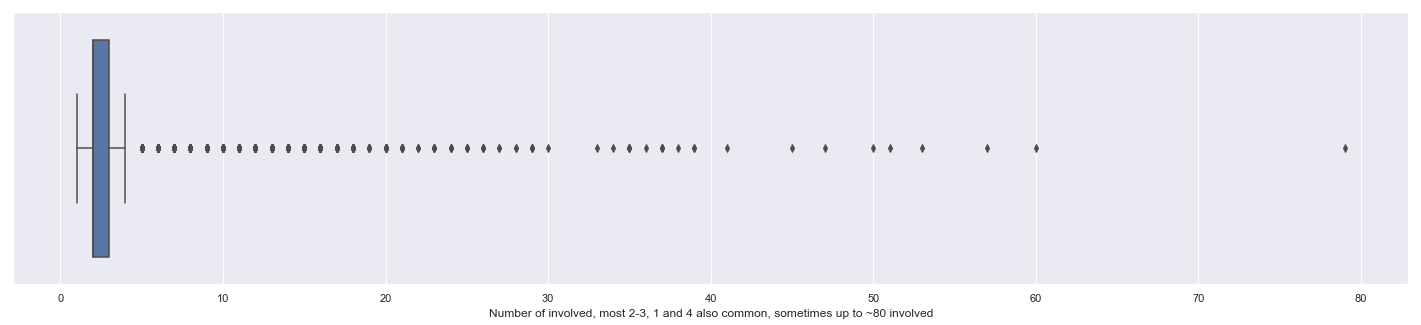

In [12]:
fig = plt.figure(figsize=(25,5))
ax = sns.boxplot(grouped_by_provider_id.count()['accident_id'])
ax.set_xlabel('Number of involved, most 2-3, 1 and 4 also common, sometimes up to ~80 involved')

In [13]:
num_accidents = sum(same_provider_id_appears)
num_involved = len(involved_hebrew)
print(f'Number of accidents in the table: {num_accidents}, number involved in these accidents: {num_involved}')

Number of accidents in the table: 710423, number involved in these accidents: 1678965


In [15]:
percents_num_involved = pd.DataFrame({'Num people involved': same_provider_id_appears.index, 'Num accidents': same_provider_id_appears})
percents_num_involved['% accidents'] = percents_num_involved['Num accidents'] / num_accidents * 100
percents_num_involved = percents_num_involved.sort_index()
percents_num_involved['% accidents accumulated'] = percents_num_involved['% accidents'].cumsum()
print('Percents of people involved in an accident')
percents_num_involved.head(10)    

Percents of people involved in an accident


,Num people involved,Num accidents,% accidents,% accidents accumulated
1,1,75982,10.695318,10.695318
2,2,435580,61.312767,72.008085
3,3,125737,17.698892,89.706977
4,4,40477,5.697591,95.404569
5,5,18207,2.562839,97.967408
6,6,8365,1.177468,99.144876
7,7,3020,0.425099,99.569975
8,8,1280,0.180174,99.750149
9,9,730,0.102756,99.852905
10,10,377,0.053067,99.905972


Text(0.5, 1.0, 'Percent of accidents per number of people involved in an accident')

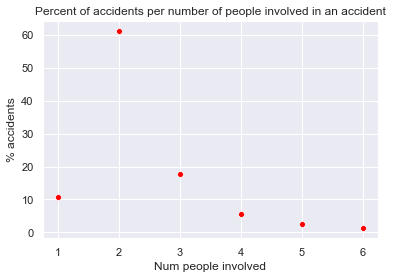

In [20]:
ax = sns.scatterplot(x='Num people involved', y='% accidents', color='red', data=percents_num_involved.head(6))
ax.set_title('Percent of accidents per number of people involved in an accident')

Text(0.5, 1.0, 'Accumulative percentage of incidents per number of people involved in an accident')

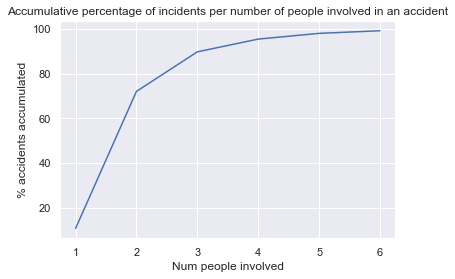

In [22]:
ax = sns.lineplot(x='Num people involved', y='% accidents accumulated', data=percents_num_involved.head(6))
ax.set_title('Accumulative percentage of incidents per number of people involved in an accident')

Small insight: 72% have up to 2 people involved, 90% have 3 or less, 95% have 4 or less, 99% have 6 or less

In [23]:
print('Example of 6 people involved')
involved_hebrew[involved_hebrew['provider_and_id'] == 12008000037]

Example of 6 people involved


,accident_id,provider_and_id,provider_code,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,sex_hebrew,vehicle_type,vehicle_type_hebrew,safety_measures,safety_measures_hebrew,involve_yishuv_symbol,involve_yishuv_name,injury_severity,injury_severity_hebrew,injured_type,injured_type_hebrew,injured_position,injured_position_hebrew,population_type,population_type_hebrew,home_region,home_region_hebrew,home_district,home_district_hebrew,home_natural_area,home_natural_area_hebrew,home_municipal_status,home_municipal_status_hebrew,home_residence_type,home_residence_type_hebrew,hospital_time,hospital_time_hebrew,medical_type,medical_type_hebrew,release_dest,release_dest_hebrew,safety_measures_use,safety_measures_use_hebrew,late_deceased,late_deceased_hebrew,car_id,involve_id,accident_year,accident_month,injury_severity_mais,injury_severity_mais_hebrew
45079,2008000037,12008000037,1,3,נפגע,0,5,20-24,2.0,נקבה,1.0,רכב נוסעים פרטי,5.0,לא ידוע,681.0,גבעת שמואל,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,1.0,ישב ברכב במושב קדמי,1.0,יהודים,4.0,המרכז,42,פתח תקווה,422.0,אזור פתח תקווה,NaN,NaN,17.0,"10,000-19,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2008,9,NaN,NaN
45108,2008000037,12008000037,1,3,נפגע,0,1,00-04,2.0,נקבה,12.0,מונית,5.0,לא ידוע,604.0,בית עריף,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,2.0,ישב ברכב במושב אחורי,1.0,יהודים,4.0,המרכז,43,רמלה,431.0,אזור לוד,25.0,חבל מודיעין,31.0,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,2008,9,NaN,NaN
45152,2008000037,12008000037,1,1,נהג,2007,8,35-39,1.0,זכר,12.0,מונית,5.0,לא ידוע,604.0,בית עריף,NaN,NaN,NaN,NaN,8.0,לא ידוע,1.0,יהודים,4.0,המרכז,43,רמלה,431.0,אזור לוד,25.0,חבל מודיעין,31.0,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2,2008,9,NaN,NaN
46422,2008000037,12008000037,1,2,נהג נפגע,2005,5,20-24,1.0,זכר,1.0,רכב נוסעים פרטי,5.0,לא ידוע,3000.0,ירושלים,3.0,פצוע קל,2.0,נהג - רכב בעל 4 גלגלים ויותר,1.0,ישב ברכב במושב קדמי,1.0,יהודים,1.0,ירושלים,11,ירושלים,111.0,הרי יהודה,NaN,NaN,11.0,ירושלים,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,2008,9,NaN,NaN
46423,2008000037,12008000037,1,3,נפגע,0,8,35-39,2.0,נקבה,12.0,מונית,5.0,לא ידוע,604.0,בית עריף,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,1.0,ישב ברכב במושב קדמי,1.0,יהודים,4.0,המרכז,43,רמלה,431.0,אזור לוד,25.0,חבל מודיעין,31.0,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,2008,9,NaN,NaN
46424,2008000037,12008000037,1,3,נפגע,0,1,00-04,1.0,זכר,12.0,מונית,5.0,לא ידוע,604.0,בית עריף,3.0,פצוע קל,3.0,נוסע - רכב בעל 4 גלגלים ויותר,2.0,ישב ברכב במושב אחורי,1.0,יהודים,4.0,המרכז,43,רמלה,431.0,אזור לוד,25.0,חבל מודיעין,31.0,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5,2008,9,NaN,NaN


# provider_code

In [24]:
provider_code_counts = involved_hebrew['provider_code'].value_counts()
print('Counts of different values of provider_code')
provider_code_counts

Counts of different values of provider_code


3    1263183
1     415782
Name: provider_code, dtype: int64

In [25]:
print(f'Small: About {(100 * provider_code_counts[1]/(provider_code_counts[1] + provider_code_counts[3])).round(0)} % of accidents get investigated by the police.')

Small: About 25.0 % of accidents get investigated by the police.


# involved_type

In [28]:
print('Counts of different values of involved_type:')
involved_hebrew['involved_type'].value_counts()

Counts of different values of involved_type:


2    635781
1    629760
3    413424
Name: involved_type, dtype: int64

In [29]:
print('Counts of different values of involved_type_hebrew:')
involved_hebrew['involved_type_hebrew'].value_counts()

Counts of different values of involved_type_hebrew:


נהג נפגע    635781
נהג         629760
נפגע        413424
Name: involved_type_hebrew, dtype: int64

This is a table of all involved, an involved can be a passanger/pedastrian that was injured.  But he can also be a driver.  There are 2 types of drivers - injured and not injured  

In [30]:
driver_or_injured = involved_hebrew.copy()
driver_or_injured['driver'] = driver_or_injured['involved_type'].apply(lambda involved_type: 1 if involved_type in [1,2] else 0)
driver_or_injured['injured'] = driver_or_injured['involved_type'].apply(lambda involved_type: 1 if involved_type in [2,3] else 0)
print(f"Drivers: {driver_or_injured['driver'].sum()}, injured: {driver_or_injured['injured'].sum()}")

Drivers: 1265541, injured: 1049205


In [31]:
print(f"Small: Drivers are around {(100 * driver_or_injured['driver'].value_counts()[1] / len(involved_hebrew)).round()}% of involved in accidents")

Small: Drivers are around 75.0% of involved in accidents


In [34]:
print('Number of injured and not injured:')
driver_or_injured['injured'].value_counts()

Number of injured and not injured:


1    1049205
0     629760
Name: injured, dtype: int64

In [33]:
print(f"Small: Injured are around {(100 * driver_or_injured['injured'].value_counts()[1] / len(involved_hebrew)).round()}% of involved in accidents where there are injuries")

Small: Injured are around 62.0% of involved in accidents where there are injuries


Text(0.5, 1.0, 'Number of injured per accident')

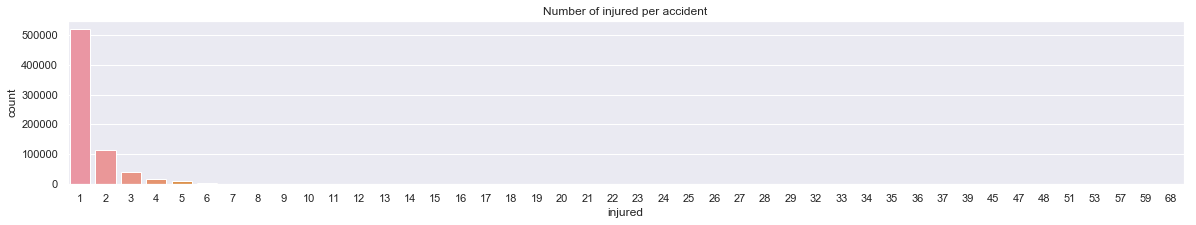

In [35]:
fig = plt.figure(figsize=(20,3))
ax = sns.countplot(driver_or_injured.groupby(by='provider_and_id')['injured'].sum())
ax.set_title('Number of injured per accident')

In [36]:
print('Numbers of accidents per number of injured:')
driver_or_injured.groupby(by='provider_and_id')['injured'].sum().value_counts()

Numbers of accidents per number of injured:


1     519139
2     114651
3      40255
4      19314
5       9707
6       3646
7       1685
8        823
9        494
10       235
11       135
12        91
13        58
14        46
15        33
16        16
17        16
18        11
20         9
21         8
19         7
24         6
22         4
35         4
26         4
39         3
28         3
29         2
34         2
36         2
57         1
53         1
51         1
48         1
47         1
45         1
59         1
37         1
23         1
33         1
32         1
27         1
25         1
68         1
Name: injured, dtype: int64

In [37]:
injured_nums = pd.DataFrame({'Num accidents': driver_or_injured.groupby(by='provider_and_id')['injured'].sum().value_counts().sort_index()})
injured_nums.index.names = ['Num injured']
injured_nums['% accidents'] = injured_nums['Num accidents'] / injured_nums['Num accidents'].sum() * 100
injured_nums['acc % accidents'] = injured_nums['% accidents'].cumsum()
print('Number of accidents with given number of injured ')
injured_nums

Number of accidents with given number of injured 


,Num accidents,% accidents,acc % accidents
Num injured,,,
1,519139,73.074633,73.074633
2,114651,16.138413,89.213046
3,40255,5.666342,94.879389
4,19314,2.718662,97.598051
5,9707,1.366369,98.964420
6,3646,0.513215,99.477635
7,1685,0.237183,99.714818
8,823,0.115846,99.830664
9,494,0.069536,99.900200


In [38]:
tmp = driver_or_injured.groupby(by='provider_and_id')[['injured','provider_code']].max()
tmp['provider_code'] = tmp['provider_code'].map({1:1, 3:0})
print("Seems that there is no accident without any injured (we only have data with injuries), so can't do correlation between whether police opened investigation for injured")
#tmp.corr()

Seems that there is no accident without any injured (we only have data with injuries), so can't do correlation between whether police opened investigation for injured


# license_acquiring_date

In [39]:
involved_hebrew['license_acquiring_date'].value_counts().sort_index()

0       752295
1911         1
1948        38
1949       163
1950       204
1951       145
1952       217
1953       163
1954       228
1955       279
1956       917
1957       928
1958       969
1959      1012
1960      1186
1961      1269
1962      1980
1963      2583
1964      2699
1965      3282
1966      4058
1967      3291
1968      4244
1969      4662
1970      4965
1971      5099
1972      7837
1973      6758
1974      8850
1975      9086
         ...  
1991     29404
1992     25241
1993     25413
1994     23402
1995     28187
1996     27991
1997     24733
1998     26535
1999     28378
2000     32362
2001     29148
2002     29910
2003     30268
2004     30361
2005     30492
2006     30520
2007     30874
2008     30694
2009     26722
2010     21895
2011     20121
2012     16382
2013     14592
2014     13173
2015      8980
2016      5958
2017      4581
2018       973
3055         1
4444        44
Name: license_acquiring_date, Length: 75, dtype: int64

TODO: Years 1911, 3055, 4444 don't make sense and need to be cleaned out

Need to understand if all the values of 752295 without license_acquiring_date are because they were not drivers

Seems that small part of Injured drivers don't have a license date, but a very large part (>50%) of the Drivers don't have!!!

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Number of accidents: 893414


Text(0.5, 1.0, 'Number of accidents a driver is involved in based on number of years on the road')

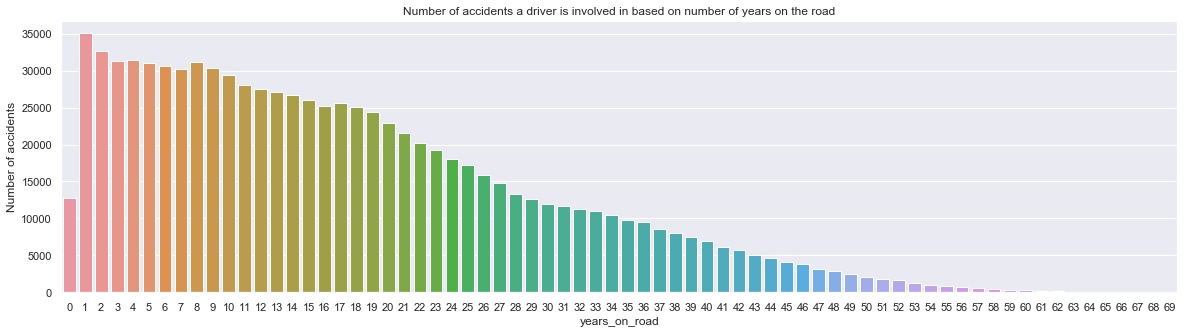

In [40]:
num_years_before_accident = involved_hebrew.copy()
num_years_before_accident = involved_hebrew[((involved_hebrew['involved_type'] == 1) | (involved_hebrew['involved_type'] == 2)) 
                                            & (involved_hebrew['license_acquiring_date'] != 0)
                                            & (involved_hebrew['license_acquiring_date'] >= 1948)
                                            & (involved_hebrew['license_acquiring_date'] <= 2018)
                                            & (involved_hebrew['license_acquiring_date'] <= involved_hebrew['accident_year'])]
num_years_before_accident['years_on_road'] = num_years_before_accident.apply(lambda driver: driver['accident_year'] - driver['license_acquiring_date'], axis=1)
print(f'Number of accidents: {len(num_years_before_accident)}')
plt.figure(figsize=(20,5)).tight_layout()
ax = sns.countplot(num_years_before_accident['years_on_road'])
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accidents a driver is involved in based on number of years on the road')

Text(0.5, 1.0, 'KDE of years on the road vs chance of being involved in an accident')

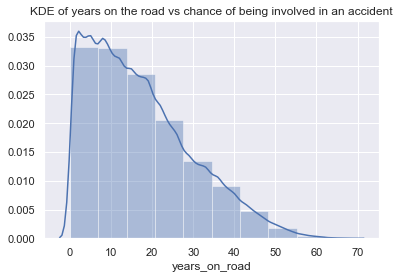

In [42]:
ax = sns.distplot(num_years_before_accident['years_on_road'], bins=10)
ax.set_title('KDE of years on the road vs chance of being involved in an accident')

In [43]:
print(f"Number of accidents in first 10 years of driving\n{num_years_before_accident['years_on_road'].value_counts().sort_index().head(10)}")

Number of accidents in first 10 years of driving
0    12792
1    35033
2    32594
3    31258
4    31381
5    31038
6    30570
7    30223
8    31169
9    30391
Name: years_on_road, dtype: int64


In [46]:
per_num_years_before_accident = pd.DataFrame({'Years on road':  num_years_before_accident['years_on_road'].value_counts().sort_index().index,
                                              'Num accidents': num_years_before_accident['years_on_road'].value_counts().sort_index()})
per_num_years_before_accident['% accidents'] = (per_num_years_before_accident['Num accidents'] /
                                                per_num_years_before_accident['Num accidents'].sum() * 100)
per_num_years_before_accident['% accidents accumulated'] = per_num_years_before_accident['% accidents'].cumsum()
print('Number of accidents with numerous years with license of the driver:')
per_num_years_before_accident.head(12)           

Number of accidents with numerous years with license of the driver:


,Years on road,Num accidents,% accidents,% accidents accumulated
0,0,12792,1.431811,1.431811
1,1,35033,3.921250,5.353061
2,2,32594,3.648253,9.001314
3,3,31258,3.498714,12.500028
4,4,31381,3.512481,16.012509
5,5,31038,3.474089,19.486599
6,6,30570,3.421706,22.908305
7,7,30223,3.382866,26.291171
8,8,31169,3.488752,29.779923
9,9,30391,3.401670,33.181593


Small: 9% of accidents happen with drivers in their first 2 years after getting a license, 20% in their first 5 years, and a third of accidents happen with drivers in their first 9 years 

How come many values are missing for 'license_acquiring_date'?

Text(0.5, 1.0, 'Number of drivers with given license year per year of accident')

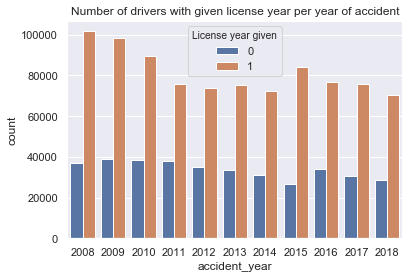

In [48]:
license_year_exists = involved_hebrew.copy()
license_year_exists = license_year_exists[(license_year_exists['involved_type'] == 1) | (license_year_exists['involved_type'] == 2)]
license_year_exists['License year given'] = (license_year_exists['license_acquiring_date'] != 0).astype(int)
ax = sns.countplot(x='accident_year', data=license_year_exists, hue='License year given')
ax.set_title('Number of drivers with given license year per year of accident')

Seems not dependent on year - around 1/3 of accidents, there is no license date for the driver

Text(0.5, 1.0, 'Number of drivers with a given license year based on whether a police report was open (provider_code 1)')

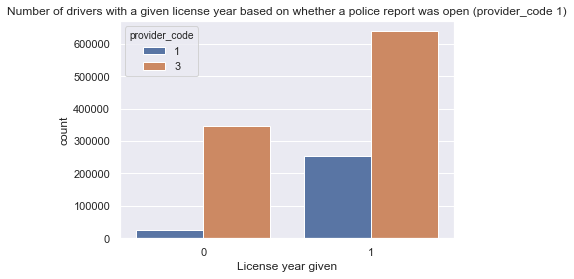

In [49]:
ax = sns.countplot(x='License year given', hue='provider_code', data=license_year_exists)
ax.set_title('Number of drivers with a given license year based on whether a police report was open (provider_code 1)')

Text(0.5, 1.0, 'Number of drivers with a given license year based on whether a police report was open (provider_code 1)')

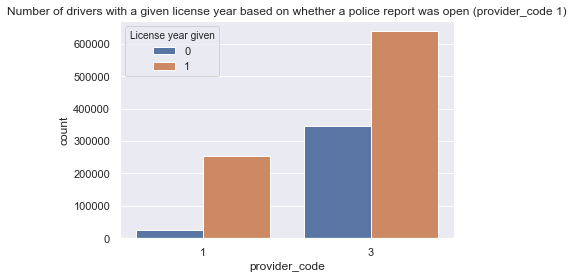

In [50]:
ax = sns.countplot(hue='License year given', x='provider_code', data=license_year_exists)
ax.set_title('Number of drivers with a given license year based on whether a police report was open (provider_code 1)')

Conclusion: when the accident doesn't get investigated, there is usually no information when the license was issued

# age_group

In [51]:
print('Number of involved in every age_group:')
involved_hebrew['age_group'].value_counts()

Number of involved in every age_group:


99    356515
6     170481
5     157587
7     152015
8     134018
9     114566
10     95491
11     83717
4      77636
12     75211
13     62450
14     41868
2      35637
3      33779
1      30175
15     26725
16     17040
17      9348
18      4706
Name: age_group, dtype: int64

In [52]:
print('Number of involved in every age_group_hebrew:')
involved_hebrew['age_group_hebrew'].value_counts()

Number of involved in every age_group_hebrew:


לא ידוע       356515
25-29         170481
20-24         157587
30-34         152015
35-39         134018
40-44         114566
45-49          95491
50-54          83717
15-19          77636
55-59          75211
60-64          62450
65-69          41868
05-09          33136
10-14          31496
00-04          30175
70-74          26725
75-79          17040
80-84           9348
85+             4706
05-ספטמבר       2501
אוקטובר-14      2283
Name: age_group_hebrew, dtype: int64

In [53]:
print(f"Percentage doesn't have age group: {involved_hebrew['age_group_hebrew'].value_counts()['לא ידוע'] / len(involved_hebrew) * 100}")

Percentage doesn't have age group: 21.23421274416084


In [54]:
print(f"Number of missing age group: total: {involved_hebrew['age_group_hebrew'].value_counts()['לא ידוע']}, investigated by police: {involved_hebrew[involved_hebrew['provider_code'] == 1]['age_group_hebrew'].value_counts()['לא ידוע']}, not investigated by police: {involved_hebrew[involved_hebrew['provider_code'] == 3]['age_group_hebrew'].value_counts()['לא ידוע']}")
      

Number of missing age group: total: 356515, investigated by police: 16366, not investigated by police: 340149


In [56]:
print('Something strange happens with age_group 2 and 3:')
involved_hebrew['age_group'].value_counts()[12:14]

Something strange happens with age_group 2 and 3:


2    35637
3    33779
Name: age_group, dtype: int64

In [57]:
print('age_group 2 and 3 is split up into 4 groups in age_group_hebrew:')
involved_hebrew['age_group_hebrew'].value_counts()[['05-09', '10-14', '05-ספטמבר', 'אוקטובר-14']]

age_group 2 and 3 is split up into 4 groups in age_group_hebrew:


05-09         33136
10-14         31496
05-ספטמבר      2501
אוקטובר-14     2283
Name: age_group_hebrew, dtype: int64

In [58]:
print('Adding pairs of age_group_hebrew categories adds up to age_group 2 and 3:')
counts = involved_hebrew['age_group_hebrew'].value_counts()
print(counts['05-09'] + counts['05-ספטמבר'])
print(counts['10-14'] + counts['אוקטובר-14'])

Adding pairs of age_group_hebrew categories adds up to age_group 2 and 3:
35637
33779


In [60]:
print('Years where age_group_hebrew categories are screwed up for 05-..:')
involved_hebrew[involved_hebrew['age_group_hebrew'] == '05-ספטמבר'].groupby(by='accident_year')['provider_and_id'].count()

Years where age_group_hebrew categories are screwed up for 05-..:


accident_year
2008    1237
2009    1264
Name: provider_and_id, dtype: int64

In [61]:
print('Years where age_group_hebrew categories are screwed up for 14-..:')
involved_hebrew[involved_hebrew['age_group_hebrew'] == 'אוקטובר-14'].groupby(by='accident_year')['provider_and_id'].count()

Years where age_group_hebrew categories are screwed up for 14-..:


accident_year
2008    1114
2009    1169
Name: provider_and_id, dtype: int64

There is indeed a problem in the field *age_group_hebrew* that 2 values of *age_group* are split into 2 values each of *age_group_hebrew*

Fixing in the original table:

In [62]:
fixed = driver_or_injured.copy() # to have also info of whether it's a driver or injured
fixed['age_group_hebrew'].replace({'05-ספטמבר': '05-09', 'אוקטובר-14':'10-14'}, inplace=True)
print('Involved age groups after fix:')
fixed['age_group_hebrew'].value_counts().sort_index()

Involved age groups after fix:


00-04       30175
05-09       35637
10-14       33779
15-19       77636
20-24      157587
25-29      170481
30-34      152015
35-39      134018
40-44      114566
45-49       95491
50-54       83717
55-59       75211
60-64       62450
65-69       41868
70-74       26725
75-79       17040
80-84        9348
85+          4706
לא ידוע    356515
Name: age_group_hebrew, dtype: int64

In [63]:
print('Ages of involved drivers')
fixed[fixed['driver'] == 1]['age_group_hebrew'].value_counts().sort_index()

Ages of involved drivers


00-04          57
05-09        1370
10-14        3887
15-19       36455
20-24      108166
25-29      132976
30-34      124449
35-39      111376
40-44       94997
45-49       77050
50-54       65281
55-59       57058
60-64       46471
65-69       29559
70-74       16875
75-79        9515
80-84        4535
85+          1980
לא ידוע    343484
Name: age_group_hebrew, dtype: int64

Seems there are some really minor drivers ages 0-4 etc.

Text(0.5, 1.0, 'Number of people involved in accidents based on age group')

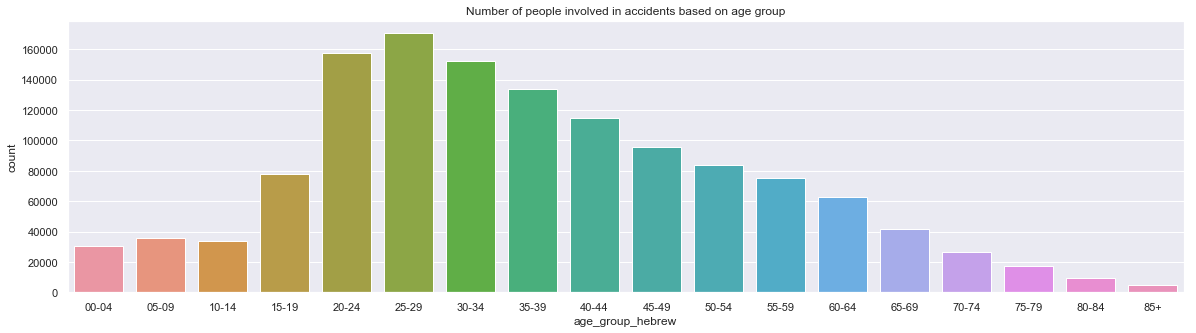

In [64]:
known_age_groups = fixed[fixed['age_group_hebrew'] != 'לא ידוע'].sort_values(by='age_group_hebrew')
plt.figure(figsize=(20,5))
ax = sns.countplot(x='age_group_hebrew',data=known_age_groups)
ax.set_title('Number of people involved in accidents based on age group')

Text(0.5, 1.0, 'Number of drivers involved in accidents based on age group')

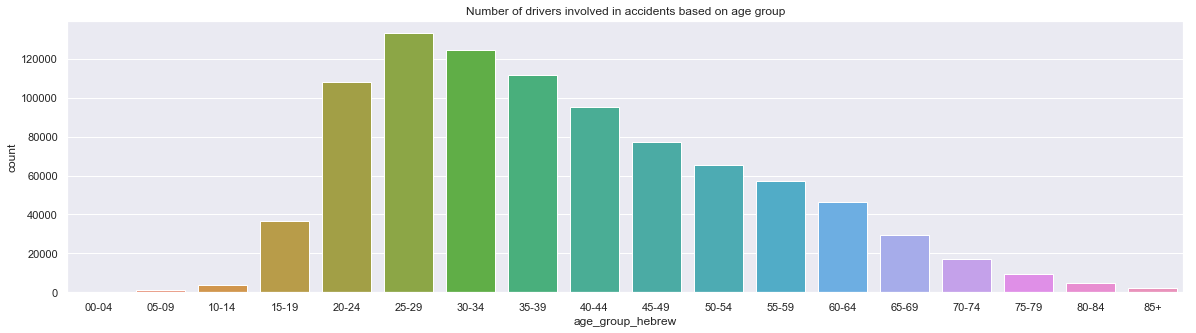

In [65]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='age_group_hebrew',data=known_age_groups[known_age_groups['driver'] == 1])
ax.set_title('Number of drivers involved in accidents based on age group')

Text(0.5, 1.0, 'Number of injured in accidents based on age group')

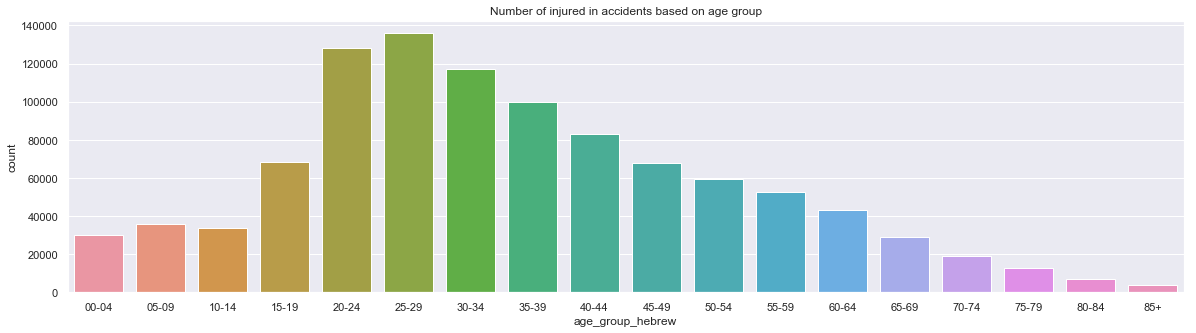

In [66]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='age_group_hebrew',data=known_age_groups[known_age_groups['injured'] == 1])
ax.set_title('Number of injured in accidents based on age group')

In [68]:
age_acc = pd.DataFrame({'Num injured': known_age_groups[known_age_groups['injured'] == 1]['age_group_hebrew'].value_counts().sort_index()})
age_acc['% injured'] = age_acc['Num injured'] / age_acc['Num injured'].sum() * 100
age_acc['Acc % injured'] = age_acc['% injured'].cumsum()
print('Number of injured based on age groups:')
age_acc

Number of injured based on age groups:


,Num injured,% injured,Acc % injured
00-04,30172,2.939205,2.939205
05-09,35626,3.470507,6.409712
10-14,33692,3.282106,9.691818
15-19,68543,6.677116,16.368934
20-24,128425,12.510521,28.879455
25-29,135819,13.230807,42.110262
30-34,117376,11.434183,53.544445
35-39,99775,9.719581,63.264026
40-44,82796,8.065572,71.329598
45-49,67799,6.604639,77.934237


Small: Almost 10% of injured are 14 and younger, 7% are younger than 19

# Sex

In [69]:
print('Split of involved into Male and Female:')
fixed['sex_hebrew'].value_counts()

Split of involved into Male and Female:


זכר     818780
נקבה    507647
Name: sex_hebrew, dtype: int64

Text(0.5, 1.0, 'Males and females involved in accidents')

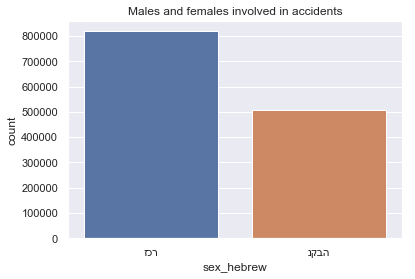

In [70]:
ax = sns.countplot(x='sex_hebrew', data=fixed)
ax.set_title('Males and females involved in accidents')

Text(0.5, 1.0, 'Split involved into drivers/not drivers involved in accidents per male/female')

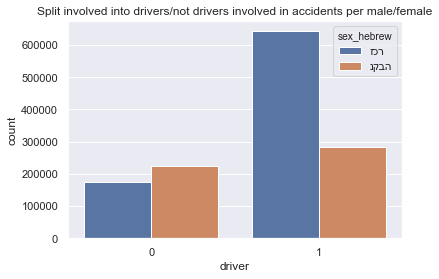

In [72]:
ax = sns.countplot(hue='sex_hebrew', x='driver', data=fixed)
ax.set_title('Split involved into drivers/not drivers involved in accidents per male/female')

Text(0.5, 1.0, 'Split involved into drivers/not drivers involved in accidents per male/female')

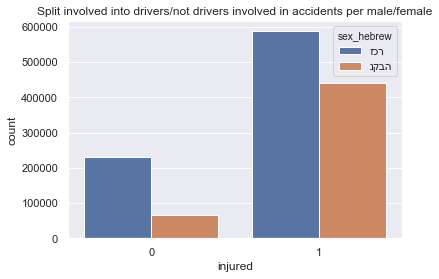

In [73]:
ax = sns.countplot(hue='sex_hebrew', x='injured', data=fixed)
ax.set_title('Split involved into drivers/not drivers involved in accidents per male/female')

Small: 
- there are many more men involved than women (almost twice as much)
- most majority of men that are involved are driving, women are slightly more drivers than non-drivers - perhaps many of men are drivers that are not injured
- Larger part of women are injured than men - perhaps because there are many more men drivers (will be involved even if not injured), women are less drivers, and will appear in the statistics more if injured

# vehicle_type

In [74]:
print('Different values of vehicle_type_hebrew with number of involved in this type of vehicle:')
fixed['vehicle_type_hebrew'].value_counts()

Different values of vehicle_type_hebrew with number of involved in this type of vehicle:


רכב נוסעים פרטי                     1067568
אחר ולא ידוע                          93281
אוטובוס                               75899
משא עד 3.5 טון - אחוד (טרנזיט)        74917
אופנוע 51 עד 125 סמ"ק                 45034
מונית                                 44870
משא עד 3.5  טון - לא אחוד (טנדר)      40595
אופנוע 126 עד 400 סמ"ק                32332
אופניים                               18842
משא 3.6 עד 12.0 טון                   18084
אוטובוס זעיר                          15572
אופנוע 401+ סמ"ק                      11231
אופנוע עד 50 סמ"ק                     11153
משא 16.0 עד 33.9 טון                   8823
משא 34.0+ טון                          5119
משא 12.1 עד 15.9 טון                   4409
טרקטור                                 4114
משא עד 4 טון - אחוד (טרנזיט)           3312
אופנוע 51 עד 250 סמ"ק                  2324
משא עד 4 טון - לא אחוד (טנדר)          1837
אופניים חשמליים                        1795
משא 3.6 עד 9.9 טון                     1629
רכבת                            

In [75]:
print('Different values of vehicle_type_hebrew with number of involved in this type of vehicle (ordered alphabetically):')
fixed['vehicle_type_hebrew'].value_counts().sort_index()

Different values of vehicle_type_hebrew with number of involved in this type of vehicle (ordered alphabetically):


אוטובוס                               75899
אוטובוס זעיר                          15572
אופנוע 126 עד 400 סמ"ק                32332
אופנוע 251 עד 500 סמ"ק                  378
אופנוע 401+ סמ"ק                      11231
אופנוע 501+ סמ"ק                        232
אופנוע 51 עד 125 סמ"ק                 45034
אופנוע 51 עד 250 סמ"ק                  2324
אופנוע עד 50 סמ"ק                     11153
אופניים                               18842
אופניים חשמליים                        1795
אחר ולא ידוע                          93281
טרקטור                                 4114
מונית                                 44870
משא 10.0 עד 12.0 טון                    261
משא 10.0 עד 15.9 טון                    207
משא 12.1 עד 15.9 טון                   4409
משא 16.0 עד 33.9 טון                   8823
משא 3.6 עד 12.0 טון                   18084
משא 3.6 עד 9.9 טון                     1629
משא 34.0+ טון                          5119
משא 4.1 עד 9.9 טון                      315
משא עד 3.5  טון - לא אחוד (טנדר)

TODO: do some more analysis about this category

# safety_measures_use

In [76]:
print('Different values of safety_measures_use_hebrew with number of involved:')
fixed['safety_measures_use_hebrew'].value_counts(dropna=False)

Different values of safety_measures_use_hebrew with number of involved:


NaN              1621321
\t כן\t            40189
\t לא  ידוע\t      12192
\t לא\t             5263
Name: safety_measures_use_hebrew, dtype: int64

In [77]:
print('Different values of safety_measures_use with number of involved:')
fixed['safety_measures_use'].value_counts(dropna=False)

Different values of safety_measures_use with number of involved:


NaN    1621321
1.0      40189
3.0      12192
2.0       5263
Name: safety_measures_use, dtype: int64

Mostly not usefull since in vast majority empty (~98%)

In [68]:
fixed.groupby(by='accident_year')['safety_measures_use'].value_counts(dropna=False)

accident_year  safety_measures_use
2008           NaN                    180540
               1.0                      3041
               3.0                      1676
               2.0                       568
2009           NaN                    179301
               1.0                      3324
               3.0                      1589
               2.0                       438
2010           NaN                    164934
               1.0                      3441
               3.0                      1403
               2.0                       522
2011           NaN                    147112
               1.0                      3577
               3.0                       929
               2.0                       448
2012           NaN                    140241
               1.0                      3651
               3.0                       871
               2.0                       464
2013           NaN                    139470
               1.0  

Don't have this information more than before also in 2018

# involve_yishuv_symbol and involve_yishuv_name

In [78]:
print('Number of involved per involve_yishuv_symbol:')
fixed['involve_yishuv_symbol'].value_counts(dropna=False).head()

Number of involved per involve_yishuv_symbol:


NaN       368345
3000.0     89150
5000.0     77325
4000.0     45929
8300.0     45011
Name: involve_yishuv_symbol, dtype: int64

In [79]:
print('Numer of different values of involve_yishuv_symbol:')
fixed['involve_yishuv_symbol'].value_counts(dropna=False).shape[0]

Numer of different values of involve_yishuv_symbol:


1557

In [80]:
print('Numer of different values of involve_yishuv_name:')
fixed['involve_yishuv_name'].value_counts(dropna=False).shape[0]

Numer of different values of involve_yishuv_name:


1265

We can see that involve_yishuv_name and involve_yishuv_symbol don't match - even looking at the number of unique values

In [81]:
print('Most frequent Yishuv names (involve_yishuv_name):')
fixed['involve_yishuv_name'].value_counts(dropna=False).head(20)

Most frequent Yishuv names (involve_yishuv_name):


NaN             370302
ירושלים          89150
תל אביב -יפו     77325
חיפה             45929
ראשון לציון      45011
חולון            38748
אשדוד            36987
פתח תקווה        35906
באר שבע          32653
נתניה            29058
אשקלון           29023
בת ים            27816
רמת גן           24854
רחובות           22167
נצרת             16950
חדרה             15562
רמלה             14917
לוד              14770
בני ברק          13776
הרצלייה          12929
Name: involve_yishuv_name, dtype: int64

In [82]:
print('Number of involved without Yishuv name:')
fixed['involve_yishuv_name'].isnull().sum()

Number of involved without Yishuv name:


370302

In [83]:
print(f"Out of all involved, there are {fixed['involve_yishuv_symbol'].value_counts(dropna=False).shape[0]} involve_yishuv_symbol unique values, out of which NaN: {fixed['involve_yishuv_symbol'].isnull().sum()}")
print(f"Out of all involved, there are {fixed['involve_yishuv_name'].value_counts(dropna=False).shape[0]} involve_yishuv_name unique values, out of which NaN: {fixed['involve_yishuv_name'].isnull().sum()}")

Out of all involved, there are 1557 involve_yishuv_symbol unique values, out of which NaN: 368345
Out of all involved, there are 1265 involve_yishuv_name unique values, out of which NaN: 370302


# injury_severity

In [84]:
print('Different number of values for injury_severity:')
fixed['injury_severity'].value_counts(dropna=False)

Different number of values for injury_severity:


3.0    1024735
NaN     629760
2.0      20644
1.0       3826
Name: injury_severity, dtype: int64

In [85]:
print('Different number of values for injury_severity_hebrew:')
fixed['injury_severity_hebrew'].value_counts(dropna=False)

Different number of values for injury_severity_hebrew:


פצוע קל     1024735
NaN          629760
פצוע קשה      20644
הרוג           3826
Name: injury_severity_hebrew, dtype: int64

In [86]:
print('Different number of values for injury_severity_hebrew out of actually injured:')
fixed[fixed['injured'] == 1]['injury_severity_hebrew'].value_counts(dropna=False)

Different number of values for injury_severity_hebrew out of actually injured:


פצוע קל     1024735
פצוע קשה      20644
הרוג           3826
Name: injury_severity_hebrew, dtype: int64

In [87]:
print('Different number of values for injury_severity_hebrew out of NOT injured:')
fixed[fixed['injured'] == 0]['injury_severity_hebrew'].value_counts(dropna=False)

Different number of values for injury_severity_hebrew out of NOT injured:


NaN    629760
Name: injury_severity_hebrew, dtype: int64

This is great, since it shows that every time someone is classified as "injured", it has severity, and when the person is not injured, there is no injury_severity

Text(0.5, 1.0, 'Number of injured per injury_serverity_hebrew')

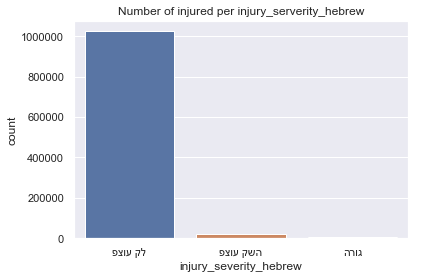

In [88]:
ax = sns.countplot(fixed[fixed['injured'] == 1]['injury_severity_hebrew'])
ax.set_title('Number of injured per injury_serverity_hebrew')

In [91]:
num_acc_with_killed = fixed[fixed['injury_severity'] == 1].groupby(by='provider_and_id')['provider_and_id'].count().shape[0]
print(f"% of accidents with a killed person: {round(num_acc_with_killed * 100 / num_accidents,1)}%")

% of accidents with a killed person: 0.5%


In [93]:
num_injured = fixed[fixed['injured'] == 1].shape[0] 
num_killed = fixed[fixed['injury_severity'] == 1].shape[0]
print(f"% of killed from all injured: {round(num_killed * 100 / num_injured, 2)}%")

% of killed from all injured: 0.36%


Text(0.5, 1.0, 'Number of injured per year')

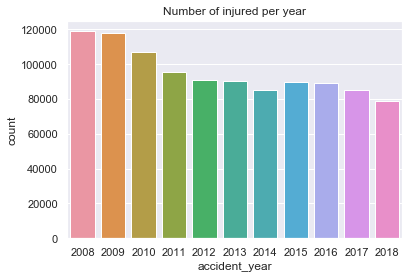

In [94]:
ax = sns.countplot(data=fixed[fixed['injured'] == 1], x='accident_year')
ax.set_title('Number of injured per year')

Text(0.5, 1.0, 'Number of killed per year')

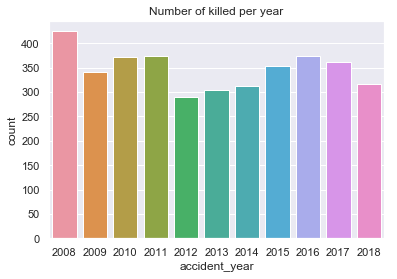

In [95]:
ax = sns.countplot(data=fixed[fixed['injury_severity'] == 1], x='accident_year')
ax.set_title('Number of killed per year')

Text(0.5, 1.0, 'Number of injured severly per year')

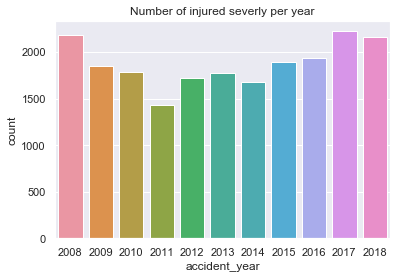

In [96]:
ax = sns.countplot(data=fixed[fixed['injury_severity'] == 2], x='accident_year')
ax.set_title('Number of injured severly per year')

Text(0.5, 1.0, 'Number of lightly injured per year')

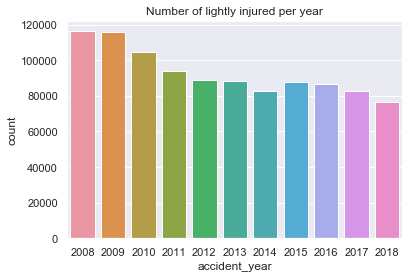

In [97]:
ax = sns.countplot(data=fixed[fixed['injury_severity'] == 3], x='accident_year')
ax.set_title('Number of lightly injured per year')

- 80,000 get injured every year in traffic accidents, but there is a trend going down, it was 120,000 10 years ago!!!
- 2000 get seriously injured per year, in the last 10 years, first there was a drop, but since 2011 it again climbs up
- More than 300 per year get killed, with a big drop in 2012 and climbing since with a drop again in 2017/2018
- Number of lightly injured - seems that got dropped seriously in last 10 years, but maybe it’s more how injured are being counted


# injured_type

In [98]:
print('Number of injured per injured_type:')
fixed[fixed['injured'] == 1]['injured_type'].value_counts(dropna=False)

Number of injured per injured_type:


2.0    514733
3.0    306445
1.0     94516
4.0     87723
6.0     16671
8.0     16653
5.0      6193
9.0      5854
7.0       415
NaN         2
Name: injured_type, dtype: int64

In [99]:
print('Number of injured per injured_type_hebrew:')
fixed[fixed['injured'] == 1]['injured_type_hebrew'].value_counts(dropna=False)

Number of injured per injured_type_hebrew:


נהג - רכב בעל 4 גלגלים ויותר     514733
נוסע - רכב בעל 4 גלגלים ויותר    306445
הולך רגל                          94516
נהג - אופנוע                      87723
נהג - אופניים                     16671
נהג - רכב לא ידוע                 16653
נוסע - אופנוע (לא נהג)             6193
נוסע - רכב לא ידוע                 5854
נוסע - אופניים (לא נהג)             415
NaN                                   2
Name: injured_type_hebrew, dtype: int64

In [100]:
injured_type = pd.DataFrame({'Num injured': fixed[fixed['injured'] == 1]['injured_type_hebrew'].value_counts(dropna=False)})
injured_type['% injured'] = injured_type['Num injured'] / injured_type['Num injured'].sum() * 100 
print('Number of injured per injured_type_hebrew and % from all injured:')
injured_type

Number of injured per injured_type_hebrew and % from all injured:


,Num injured,% injured
נהג - רכב בעל 4 גלגלים ויותר,514733,49.059335
נוסע - רכב בעל 4 גלגלים ויותר,306445,29.207352
הולך רגל,94516,9.008344
נהג - אופנוע,87723,8.360902
נהג - אופניים,16671,1.588917
נהג - רכב לא ידוע,16653,1.587202
נוסע - אופנוע (לא נהג),6193,0.590256
נוסע - רכב לא ידוע,5854,0.557946
נוסע - אופניים (לא נהג),415,0.039554
NaN,2,0.000191


Text(0.5, 1.0, 'Number of injured per injured_type_hebrew')

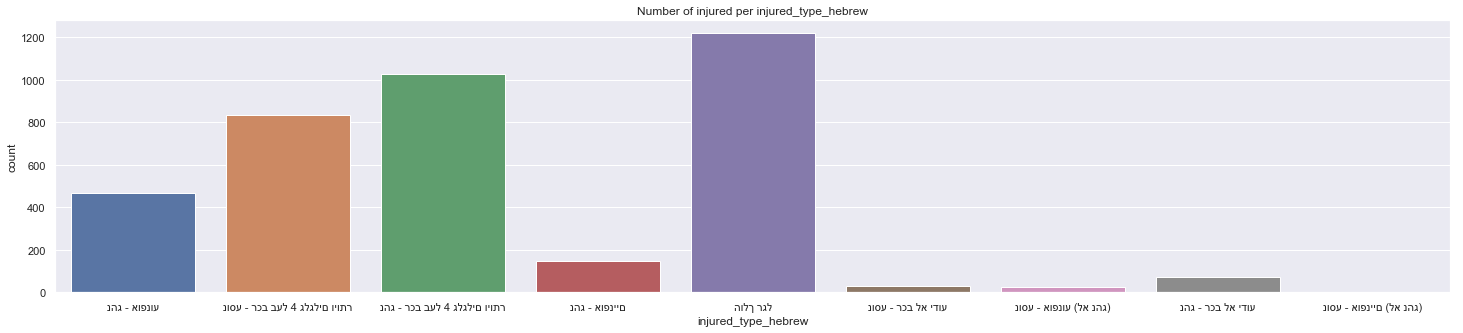

In [101]:
fig = plt.figure(figsize=(25,5))
ax = sns.countplot(x='injured_type_hebrew', data=fixed[fixed['injury_severity']==1])
ax.set_title('Number of injured per injured_type_hebrew')

In [102]:
injured_type_killed = pd.DataFrame({'Num killed': fixed[fixed['injury_severity']==1]['injured_type_hebrew'].value_counts()})
injured_type_killed['% injured'] = injured_type_killed['Num killed'] / injured_type_killed['Num killed'].sum() * 100 
print('Number of killed per injured_type_hebrew:')
injured_type_killed

Number of killed per injured_type_hebrew:


,Num killed,% injured
הולך רגל,1218,31.834814
נהג - רכב בעל 4 גלגלים ויותר,1029,26.894929
נוסע - רכב בעל 4 גלגלים ויותר,832,21.745949
נהג - אופנוע,469,12.258233
נהג - אופניים,149,3.894407
נהג - רכב לא ידוע,73,1.907998
נוסע - רכב לא ידוע,28,0.731835
נוסע - אופנוע (לא נהג),27,0.705698
נוסע - אופניים (לא נהג),1,0.026137


In [103]:
injured_type_serious = pd.DataFrame({'Num seriously injured': fixed[fixed['injury_severity']==2]['injured_type_hebrew'].value_counts()})
injured_type_serious['% injured'] = injured_type_serious['Num seriously injured'] / injured_type_serious['Num seriously injured'].sum() * 100 
print('Number of seriously injured per injured_type_hebrew:')
injured_type_serious

Number of seriously injured per injured_type_hebrew:


,Num seriously injured,% injured
הולך רגל,6325,30.638442
נהג - רכב בעל 4 גלגלים ויותר,4712,22.825034
נהג - אופנוע,3901,18.896532
נוסע - רכב בעל 4 גלגלים ויותר,3835,18.576826
נהג - אופניים,844,4.088355
נהג - רכב לא ידוע,599,2.901569
נוסע - אופנוע (לא נהג),311,1.506491
נוסע - רכב לא ידוע,94,0.455338
נוסע - אופניים (לא נהג),23,0.111413


# injured_position

In [104]:
print('Number of injured per injured_position:')
fixed[fixed['injured'] == 1]['injured_position'].value_counts(dropna=False)

Number of injured per injured_position:


1.0    711104
8.0    183633
9.0     94516
2.0     55942
4.0      1548
6.0       870
7.0       666
5.0       628
3.0       298
Name: injured_position, dtype: int64

In [105]:
print('Number of injured per injured_position_hebrew:')
fixed[fixed['injured'] == 1]['injured_position_hebrew'].value_counts(dropna=False)

Number of injured per injured_position_hebrew:


ישב ברכב במושב קדמי     711104
לא ידוע                 183633
הולך רגל                 94516
ישב ברכב במושב אחורי     55942
עמד ברכב                  1548
ירד מהרכב                  870
פעולה אחרת                 666
עלה לרכב                   628
ישב ברכב בארגז מאחור       298
Name: injured_position_hebrew, dtype: int64

# population_type

In [106]:
print('Number of involved per population_type:')
fixed['population_type'].value_counts(dropna=False)

Number of involved per population_type:


1.0    1302388
2.0     323157
3.0      44666
4.0       8731
NaN         23
Name: population_type, dtype: int64

In [107]:
print('Number of involved per population_type_hebrew:')
fixed['population_type_hebrew'].value_counts(dropna=False)

Number of involved per population_type_hebrew:


יהודים    1302388
ערבים      323157
אחרים       44666
זרים         8731
NaN            23
Name: population_type_hebrew, dtype: int64

# home_region

In [108]:
print('Number of involved per home_region:')
fixed['home_region'].value_counts(dropna=False)

Number of involved per home_region:


NaN    368351
4.0    317439
2.0    278422
5.0    223293
6.0    174203
3.0    166787
1.0    107785
7.0     42680
8.0         5
Name: home_region, dtype: int64

In [109]:
print('Number of involved per home_region_hebrew:')
fixed['home_region_hebrew'].value_counts(dropna=False)

Number of involved per home_region_hebrew:


NaN              368351
המרכז            317439
הצפון            278422
תל אביב          223293
הדרום            174203
חיפה             166787
ירושלים          107785
יהודה ושומרון     42680
חבל עזה               5
Name: home_region_hebrew, dtype: int64

# home_district

In [110]:
print('Number of involved per home_district:')
fixed['home_district'].value_counts(dropna=False)

99    368351
51    223293
24    146161
11    107785
44     99013
42     98137
31     97494
61     92940
23     88868
62     81263
32     69293
41     66179
43     54110
22     21235
21     16261
74     12748
76     11936
73     11707
29      5897
77      2424
72      1833
75      1375
71       657
80         2
86         1
81         1
87         1
Name: home_district, dtype: int64

In [110]:
print('Number of involved per home_district_hebrew:')
fixed['home_district_hebrew'].value_counts(dropna=False)

Number of involved per home_district_hebrew:


NaN             368351
תל אביב         223293
עכו             146161
ירושלים         107785
רחובות           99013
פתח תקווה        98137
חיפה             97494
אשקלון           92940
יזרעאל           88868
באר שבע          81263
חדרה             69293
השרון            66179
רמלה             54110
כנרת             21235
צפת              16261
ראמאללה          12748
בית לחם          11936
טול כרם          11707
גולן              5897
חברון             2424
שכם               1833
ירדן (יריחו)      1375
גנין               657
רפיח                 2
דיר אל-בלח           1
עזה                  1
גאבליא               1
Name: home_district_hebrew, dtype: int64

# home_natural_area

In [113]:
print('Number of different values for home_natural_area:')
fixed['home_natural_area'].value_counts(dropna=False).shape[0]

Number of different values for home_natural_area:


64

In [114]:
print('Number of different values for home_natural_area_hebrew:')
fixed['home_natural_area_hebrew'].value_counts(dropna=False).shape[0]

Number of different values for home_natural_area_hebrew:


64

In [115]:
print('Different numbers of involved per home_natural_area:')
fixed['home_natural_area'].value_counts(dropna=False)

Different numbers of involved per home_natural_area:


NaN      368351
111.0     97866
311.0     97494
511.0     95973
513.0     68962
422.0     64451
237.0     63965
512.0     58358
623.0     54341
241.0     52846
442.0     52507
441.0     46506
411.0     44700
324.0     38757
613.0     36987
614.0     36639
421.0     33686
431.0     32728
242.0     27303
323.0     23773
245.0     22460
412.0     21479
432.0     21382
246.0     20810
243.0     18811
740.0     12670
234.0     12238
760.0     11936
730.0     11707
222.0     10622
          ...  
625.0      8203
212.0      7544
621.0      6902
626.0      6152
622.0      5519
211.0      5384
235.0      4544
321.0      3956
244.0      3931
231.0      3831
213.0      3333
322.0      2807
770.0      2424
233.0      2421
292.0      2009
720.0      1833
291.0      1749
232.0      1400
293.0      1390
750.0      1375
294.0       749
710.0       657
236.0       469
624.0        95
999.0        78
627.0        51
800.0         2
810.0         1
860.0         1
870.0         1
Name: home_natural_area,

In [116]:
print('Different numbers of involved per home_natural_area_hebrew:')
fixed['home_natural_area_hebrew'].value_counts(dropna=False)

Different numbers of involved per home_natural_area_hebrew:


NaN                 375589
הרי יהודה            97866
אזור חיפה            97494
אזור תל אביב         95973
אזור חולון           68962
אזור פתח תקווה       64451
הרי נצרת-תירען       63965
אזור רמת גן          58358
אזור באר שבע         54341
אזור שפרעם           52846
אזור ראשון לציון     52507
אזור רחובות          46506
מערב השרון           44700
אזור חדרה            38757
אזור אשדוד           36987
אזור אשקלון          36639
דרום השרון           33686
אזור לוד             28923
אזור כרמיאל          27303
הר אלכסנדר           23773
אזור נהרייה          22460
מזרח השרון           21479
אזור עכו             20810
אזור יחיעם           18811
אזור רמלה            14222
נפת ראמאללה          12670
עמק יזרעאל           12238
נפת בית לחם          11936
נפת טול כרם          11707
גליל תחתון מזרחי     10622
                     ...  
אזור הערבה            8203
גליל עליון מזרחי      7544
אזור גרר              6902
הר הנגב הצפוני        6152
אזור בשור             5519
עמק חולה              5384
א

In [117]:
fixed['home_natural_area_hebrew'].value_counts(dropna=False).values - fixed['home_natural_area'].value_counts(dropna=False).values

array([ 7238,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, -3805,
           0,     0,     0,     0,  -572, -1999, -4589,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,   472,
         526,   383,     3,   412,   176,    84,   349,    10,    15,
         626,    92,   188,   374,    17,     0,     0,     0,     0,
           0], dtype=int64)

The values don't completely match between home_natural_area_hebrew and home_natural_area!!!

# home_municipal_status

In [118]:
print('Different numbers of involved per home_municipal_status:')
fixed['home_municipal_status'].value_counts(dropna=False).shape[0]

Different numbers of involved per home_municipal_status:


58

In [119]:
print('Different numbers of involved per home_municipal_status_hebrew:')
fixed['home_municipal_status_hebrew'].value_counts(dropna=False).shape[0]

Different numbers of involved per home_municipal_status_hebrew:


59

In [120]:
print('Most frequent home_municipal_status values with number of involved:')
fixed['home_municipal_status'].value_counts(dropna=False).head()

Most frequent home_municipal_status values with number of involved:


NaN     1350053
99.0     227290
73.0       6759
26.0       5982
72.0       4681
Name: home_municipal_status, dtype: int64

In [121]:
print('Most frequent home_municipal_status_hebrew values with number of involved:')
fixed['home_municipal_status_hebrew'].value_counts(dropna=False)

Most frequent home_municipal_status_hebrew values with number of involved:


NaN              1350053
מועצה מקומית      227290
מטה בנימין          6759
מטה יהודה           5982
שומרון              4681
עמק חפר             4403
הגלבוע              4327
עמק יזרעאל          4023
מטה אשר             3950
משגב                3915
גזר                 3609
באר טוביה           3537
דרום השרון          3522
חבל מודיעין         2989
חוף הכרמל           2963
חוף אשקלון          2897
לב השרון            2560
מרום הגליל          2459
מנשה                2275
גוש עציון           2092
מעלה יוסף           1814
לכיש                1697
עמק לוד             1669
זבולון              1633
שפיר                1633
הגליל התחתון        1568
מרחבים              1550
גולן                1511
בוסתן אל-מרג        1468
הגליל העליון        1466
עמק הירדן           1385
אשכול               1278
שדות נגב            1250
אל-בטוף             1191
בקעת בית שאן         969
ברנר                 966
חוף השרון            930
מבואות החרמון        920
מגידו                874
הר חברון             867


Home_municipal_status - not useful - missing in majority of the fields, and not matching home_municipal_status_hebrew

# home_residence_type

In [122]:
print('Different unique values of home_residence_type:')
fixed['home_residence_type'].value_counts(dropna=False).shape[0]

Different unique values of home_residence_type:


31

In [123]:
print('Different unique values of home_residence_type_hebrew:')
fixed['home_residence_type_hebrew'].value_counts(dropna=False).shape[0]

Different unique values of home_residence_type_hebrew:


49

We see that *home_residence_type* and *home_residence_type_hebrew* don't match!

In [124]:
print('Most frequent values of home_residence_type with number of involved')
fixed['home_residence_type'].value_counts(dropna=False).head()

Most frequent values of home_residence_type with number of involved


NaN     368351
14.0    218695
16.0    212684
13.0    160880
15.0    124450
Name: home_residence_type, dtype: int64

In [125]:
print('Number of involved with police investigation with null value for home_residence_type:')
fixed[fixed['provider_code'] == 1]['home_residence_type'].isnull().sum()

Number of involved with police investigation with null value for home_residence_type:


23536

In [126]:
print('Number of involved without police investigation with null value for home_residence_type:')
fixed[fixed['provider_code'] == 3]['home_residence_type'].isnull().sum()

Number of involved without police investigation with null value for home_residence_type:


344815

In [127]:
print('Different values of home_residence_type_hebrew with number of involved:')
fixed['home_residence_type_hebrew'].value_counts(dropna=False)

Different values of home_residence_type_hebrew with number of involved:


NaN                                      368354
יישובים יהודיים 499999-200000 תושבים     135439
100,000-199,999-תושב, יישוב יהודי        127498
20,000-49,999-תושב, יישוב יהודי          109601
יישובים יהודיים 49999-20000 תושבים       103083
יישובים יהודיים 199999-100000 תושבים      91197
יישובים יהודיים 99999-50000 תושבים        69041
50,000-99,999-תושב, יישוב יהודי           55409
ירושלים                                   45530
יישובים יהודיים 500000 תושבים ומעלה       43620
יישובים לא יהודיים 49999-20000 תושבים     43144
10,000-19,999-תושב, יישוב לא-יהודי        42854
תל אביב-יפו                               42122
יישובים לא יהודיים 19999-10000 תושבים     38564
20,000-49,999-תושב, יישוב לא-יהודי        33760
10,000-19,999-תושב, יישוב יהודי           29460
2,000-9,999-תושב, יישוב לא-יהודי          28691
חיפה                                      25441
2,000-9,999-תושב, יישוב יהודי             23755
ראשון לציון                               23007
יישובים לא יהודיים 9999-5000 תושבים     

# hospital_time

In [129]:
print('Different values of hospital_time with number of involved:')
fixed['hospital_time'].value_counts(dropna=False)

Different values of hospital_time with number of involved:


NaN    1626451
2.0      35618
1.0      16896
Name: hospital_time, dtype: int64

In [130]:
print('Different values of hospital_time_hebrew with number of involved:')
fixed['hospital_time_hebrew'].value_counts(dropna=False)

Different values of hospital_time_hebrew with number of involved:


NaN                      1626451
\t  אשפוז מעל 24 שעות      35618
\t אשפוז עד 24 שעות\t      16896
Name: hospital_time_hebrew, dtype: int64

Not very useful since doesn't appear in vast majority of cases

# medical_type

In [131]:
print('Different values of medical_type with number of involved:')
fixed['medical_type'].value_counts(dropna=False)

Different values of medical_type with number of involved:


NaN    1626451
1.0      32969
2.0      10342
3.0       4586
4.0       4287
9.0        330
Name: medical_type, dtype: int64

In [132]:
print('Different values of medical_type_hebrew with number of involved:')
fixed['medical_type_hebrew'].value_counts(dropna=False)

Different values of medical_type_hebrew with number of involved:


NaN                      1626451
\t( קל (1-8\t              32969
\t(בינוני (9-15\t          10342
\t(קשה (16-24\t             4586
\t( קשה מאוד (25-75\t       4287
\t לא  ידוע\t                330
Name: medical_type_hebrew, dtype: int64

Not extemely useful since missing in vast majority of cases

# release_dest

In [133]:
print('Different values of release_dest with number of involved:')
fixed['release_dest'].value_counts(dropna=False)

Different values of release_dest with number of involved:


NaN    1626451
1.0      44701
3.0       4927
2.0       1510
4.0        895
5.0        481
Name: release_dest, dtype: int64

In [134]:
print('Different values of release_dest_hebrew with number of involved:')
fixed['release_dest_hebrew'].value_counts(dropna=False)

Different values of release_dest_hebrew with number of involved:


NaN                              1626451
\t בית\t                           44701
\t מוסד שיקומי/ מחלקה שיקומית       4927
\t בית חולים אחר                    1510
\t מוות\t                            895
\t אחר\t                             481
Name: release_dest_hebrew, dtype: int64

Possibly not useful since missing a lot of values

# safety_measures_use

In [135]:
print('Different values of safety_measures_use with number of involved:')
fixed['safety_measures_use'].value_counts(dropna=False)

Different values of safety_measures_use with number of involved:


NaN    1621321
1.0      40189
3.0      12192
2.0       5263
Name: safety_measures_use, dtype: int64

In [153]:
print('Different values of safety_measures_use_hebrew with number of involved:')
fixed['safety_measures_use_hebrew'].value_counts(dropna=False)

NaN              1621321
\t כן\t            40189
\t לא  ידוע\t      12192
\t לא\t             5263
Name: safety_measures_use_hebrew, dtype: int64

Not very useful since missing in vast majority of cases

# late_deceased

In [136]:
print('Number of involved with different late_deceased values:')
fixed['late_deceased'].value_counts(dropna=False)

Number of involved with different late_deceased values:


NaN    1674993
1.0       3826
2.0        146
Name: late_deceased, dtype: int64

In [137]:
print('Number of involved with different late_deceased_hebrew values:')
fixed['late_deceased_hebrew'].value_counts(dropna=False)

Number of involved with different late_deceased_hebrew values:


NaN                 1674993
\tפטירה רגילה\t        3826
\tפטירה מאוחרת\t        146
Name: late_deceased_hebrew, dtype: int64

In [138]:
print('Number of involved with different injury_severity values:')
fixed['injury_severity'].value_counts(dropna=False)

Number of involved with different injury_severity values:


3.0    1024735
NaN     629760
2.0      20644
1.0       3826
Name: injury_severity, dtype: int64

Seems to be same number 3826 in both lists, but it seems in injury_severity doesn't take into account late death

# car_id, involve_id

In [140]:
print('Number of involved per different car_id values:')
fixed['car_id'].value_counts(dropna=False)

Number of involved per different car_id values:


1.0     906964
2.0     606584
NaN      92148
3.0      61063
4.0       9126
5.0       1958
6.0        553
7.0        233
8.0        115
9.0         84
10.0        51
11.0        26
14.0        12
12.0         8
13.0         6
15.0         5
16.0         4
17.0         3
18.0         3
19.0         3
20.0         3
21.0         2
27.0         2
24.0         2
30.0         1
22.0         1
23.0         1
25.0         1
26.0         1
28.0         1
29.0         1
Name: car_id, dtype: int64

In [141]:
print('Number of involved per different involve_id values:')
fixed['involve_id'].value_counts(dropna=False)

Number of involved per different involve_id values:


1     710423
2     634441
3     198861
4      73124
5      32647
6      14440
7       6075
8       3055
9       1775
10      1045
11       668
12       458
13       331
14       251
15       185
16       147
17       113
18        96
19        79
20        72
21        60
22        51
23        48
24        43
25        39
26        35
27        31
28        29
29        27
30        23
       ...  
50         6
51         5
52         4
53         4
55         3
56         3
54         3
57         3
60         2
59         2
58         2
69         1
77         1
76         1
75         1
74         1
73         1
72         1
71         1
70         1
78         1
68         1
67         1
66         1
65         1
64         1
63         1
62         1
61         1
79         1
Name: involve_id, Length: 79, dtype: int64

Seems that were both are deleted (we don't get the original values) and values are meaningless ?

# accident_year, accident_month

In [142]:
print('Number of involved in accidents per year')
fixed['accident_year'].value_counts(dropna=False)

Number of involved in accidents per year


2008    185825
2009    184652
2010    170300
2011    152066
2015    145531
2012    145227
2016    144822
2013    144818
2017    139322
2014    137158
2018    129244
Name: accident_year, dtype: int64

In [143]:
print('Number of involved in accidents per month')
fixed['accident_month'].value_counts(dropna=False).sort_index()

Number of involved in accidents per month


1     144626
2     132965
3     146202
4     135725
5     148675
6     147511
7     146144
8     144766
9     132872
10    136313
11    133290
12    129876
Name: accident_month, dtype: int64

Text(0.5, 1.0, 'Number of involved in accidents per month')

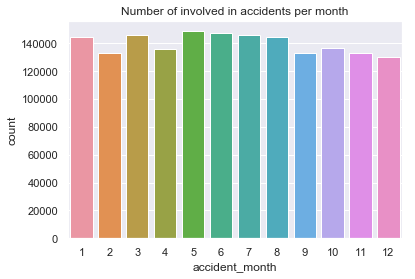

In [144]:
ax = sns.countplot(fixed['accident_month'])
ax.set_title('Number of involved in accidents per month')

Text(0.5, 1.0, 'Number of killed in accidents per month')

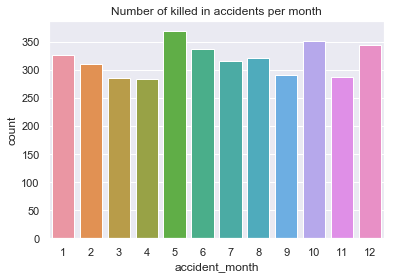

In [145]:
ax = sns.countplot(data=fixed[fixed['injury_severity']==1], x='accident_month')
ax.set_title('Number of killed in accidents per month')

# Connection between police investigation and injury severity

In [146]:
print('Number killed per provider_code:')
fixed[fixed['injury_severity'] == 1].groupby(['provider_code'])['provider_code'].count()

Number killed per provider_code:


provider_code
1    3826
Name: provider_code, dtype: int64

In [148]:
print('Number severely injured per provider_code:')
fixed[fixed['injury_severity'] == 2].groupby(['provider_code'])['provider_code'].count()

Number severely injured per provider_code:


provider_code
1    20644
Name: provider_code, dtype: int64

In [149]:
print('Number lightly injured per provider_code:')
fixed[fixed['injury_severity'] == 3].groupby(['provider_code'])['provider_code'].count()

Number lightly injured per provider_code:


provider_code
1    268210
3    756525
Name: provider_code, dtype: int64

Seems that every time there is a serious injury, police investigates

# Numbers and basic conclusions

- 1,678,965 involved
- 710,423 accidents
- Number of involved per accident:
  - most 2-3, 1 and 4 also common, sometimes up to ~80 involved
  - 60% have 2 people involved, 90% have 3 or less, 95% have 4 or less, 99% have 6 or less
- About 25.0 % of accidents get investigated by the police
- Drivers are round 75.0% of involved in accidents, Injured are round 62.0% of involved in accidents
  - Number of injured - 73% - 1 injured, 16% - 2 injured, 6% - 3 injured, 90% 1 or 2, 95% 2 or less, 98% 3 or less, 99% 5 or less
  - Seems that every accident has an injured, we don’t get other data
- 9% of accidents happen with drivers in their first 2 years after getting a license, 20% in their first 5 years, and a third of accidents happen with drivers in their first 9 years
- Age group
  - 21% don’t have age group info, vast majority when not investigated by police Number of missing age group: total: 356515, investigated by police: 16366, not investigated by police: 340149
  - Almost 10% of injured are 14 and younger, 7% are younger than 19
- Sex
  - there are many more men involved than women (almost twice as much)
  - most majority of men that are involved are driving, women are slightly more drivers than non-drivers - perhaps many of them are drivers that are not injured
  - Larger part of women are injured than men - perhaps because there are many more men drivers (will be involved even if not injured), women are less drivers, and will appear in the statistics more if injured
- Safety information appears only in 2.7% of cases - not useful
- Yishuv
  - Out of all involved, there are 1557 involve_yishuv_symbol unique values, out of which NaN: 368345
  - Out of all involved, there are 1265 involve_yishuv_name unique values, out of which NaN: 370302
- When someone is injured, there is always severity, so can count on this value
- Number of injured/killed:
  - 80,000 get injured every year in traffic accidents, but there is a trend going down, it was 120,000 10 years ago!!!
  - 2000 get seriously injured per year, in the last 10 years, first there was a drop, but since 2011 it again climbs up
  - More than 300 per year get killed, with a big drop in 2012 and climbing since with a drop again in 2017/2018
  - Number of lightly injured - seems that got dropped seriously in last 10 years, but maybe it’s more how injured are being counted
- Out of people killed
  - 32% are pedenstrians (9% of injured)
  - 12% are motorcycle riders (8% of injured)
  - 4% are bicycle riders (1.5% of injured)
  - **Total:** almost 40% are not in cars
- Out of people seriously injured
  - 31% are pedenstrians (9% of injured)
  - 19% are motorcycle riders (8% of injured)
  - 4% are bicycle riders (1.5% of injured)
  - **Total:** almost 45% are not in cars
- Seems that a month is not a good predictor of people being injured, seems that summer months are slightly worse, also when looking at number of killed per month
- Police investigated all accidents with killed or severity injured, but only ~25% of accidents with light injuries


# Conclusions about usefulness of different fields

- To be removed
  - Safety_measures - missing in vast majority (98%)
  - Home_municipal_status - missing in majority of the fields, and not matching home_municipal_status_hebrew
  - Home_residence_type - split into a lot of values, missing when no police report, home_residence_type and home_residence_type_hebrew don’t match ?
  - Hospital_time - NaN in vast majority of cases ?
  - Medical_type - NaN in vast majority of cases ?
  - Release_dest - NaN in vast majority of cases ?
  - Safety_measures_use - missing in vast majority of cases
- To be careful with
  - license_acquiring_date - missing in ½ the cases - mostly not investigated
  - age_group - missing 21% of the time, most when not investigated
  - involve_yishuv_symbol / involve_yishuv_name - seem not to fully match (see numbers)
  - population_type - a little NaNs
  - Home_region - a lot of NaNs - mostly when no police report
  - Home_district - a lot of NaNs - mostly when no police report
  - home_natural_area and home_natural_area_hebrew don’t fully match
Late_deceased - has some more info than injury_severity=1
- To be cleaned / fixed
  - license_acquiring_date - Years 1911, 3055, 4444 don't make sense and need to be cleaned out
  - Age_group_hebrew - 2 values of age_group are split into 2 values each of age_group_hebrew